In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset :-Hospital appointments no show

In [3]:
df = pd.read_csv("noshowappointments.csv")
df_raw = df.copy()

In [4]:
print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Cleaning steps

In [6]:
# Drop AppointmentID
df.drop(columns=['AppointmentID'], inplace=True, errors='ignore')

# Rename columns
df.rename(columns={
    'Hipertension':'Hypertension',
    'Handcap':'Handicap',
    'SMS_received':'SMSReceived',
    'No-show':'NoShow'
}, inplace=True)

df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Before cleaning null check

In [7]:
print("Nulls before:")
print(df_raw.isnull().sum())

Nulls before:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


## Remove invalid ages

In [8]:
df = df[(df["Age"] >=0) & (df["Age"] <= 90)]
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Remove Duplicate

In [9]:
df.drop_duplicates(inplace=True)
df.drop_duplicates

<bound method DataFrame.drop_duplicates of            PatientId Gender          ScheduledDay        AppointmentDay  Age  \
0       2.987250e+13      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62   
1       5.589978e+14      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56   
2       4.262962e+12      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62   
3       8.679512e+11      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8   
4       8.841186e+12      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56   
...              ...    ...                   ...                   ...  ...   
110522  2.572134e+12      F  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z   56   
110523  3.596266e+12      F  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z   51   
110524  1.557663e+13      F  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z   21   
110525  9.213493e+13      F  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z   38   
110526  3.775115e+14      F  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z   54 

## Categorical Encoding

In [10]:
df["Gender"] = df["Gender"].map({"F":0, "M":1})
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df["NoShow"] = (df["NoShow"] == "Yes").astype(int)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## convert datatypes

In [12]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"]) # convert day into datetime
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"]).dt.normalize() 
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [13]:
# Feature Engineering
df["WaitDays"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days.clip(lower=0) ## lower=0 means remove any negative values
df["ApptDayOfWeek"] = df["AppointmentDay"].dt.day_name()
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitDays,ApptDayOfWeek
0,2.987250e+13,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday
1,5.589978e+14,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday
2,4.262962e+12,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday
3,8.679512e+11,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,Friday
4,8.841186e+12,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,Friday


## Summary after cleaning

In [14]:
print("\n✅ Cleaned Data Summary:")
print(df.info())


✅ Cleaned Data Summary:
<class 'pandas.core.frame.DataFrame'>
Index: 109604 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       109604 non-null  float64            
 1   Gender          109604 non-null  int64              
 2   ScheduledDay    109604 non-null  datetime64[ns, UTC]
 3   AppointmentDay  109604 non-null  datetime64[ns, UTC]
 4   Age             109604 non-null  int64              
 5   Neighbourhood   109604 non-null  object             
 6   Scholarship     109604 non-null  int64              
 7   Hypertension    109604 non-null  int64              
 8   Diabetes        109604 non-null  int64              
 9   Alcoholism      109604 non-null  int64              
 10  Handicap        109604 non-null  int64              
 11  SMSReceived     109604 non-null  int64              
 12  NoShow          109604 non-null  int64              

## BEFORE vs AFTER VISUALIZATIONS

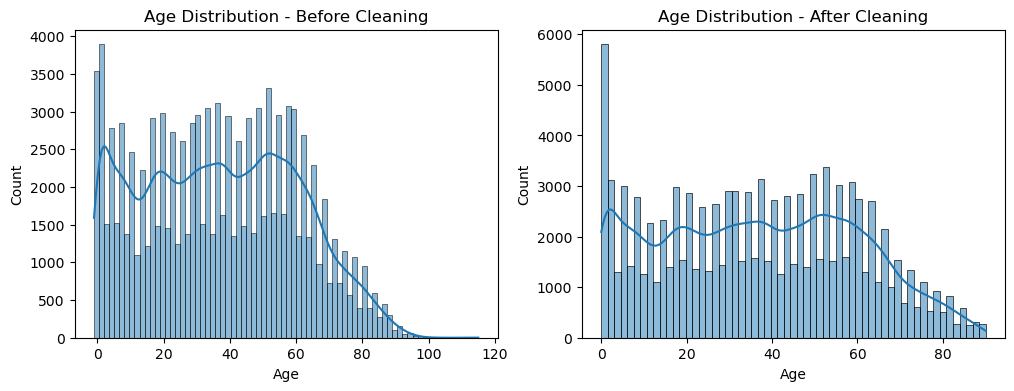

In [15]:
#1. Age Distribution
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df_raw["Age"], kde=True)
plt.title("Age Distribution - Before Cleaning")

plt.subplot(1,2,2)
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution - After Cleaning")
plt.show()

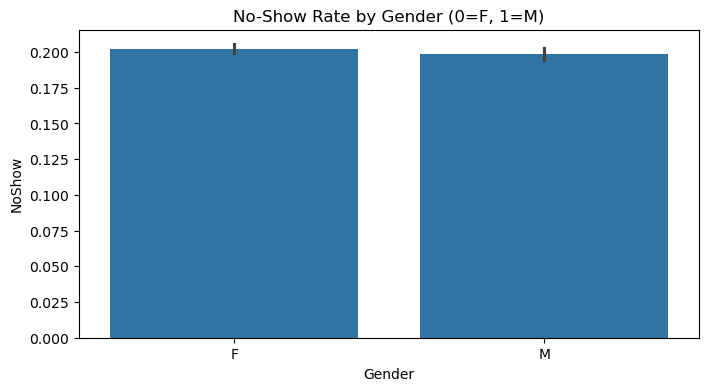

In [16]:
# 2. NoShow Rate by Gender
df["Gender"] = df["Gender"].map({0:"F", 1:"M"})
plt.figure(figsize=(8,4))
sns.barplot(x="Gender", y="NoShow", data=df)
plt.title("No-Show Rate by Gender (0=F, 1=M)")
plt.show()

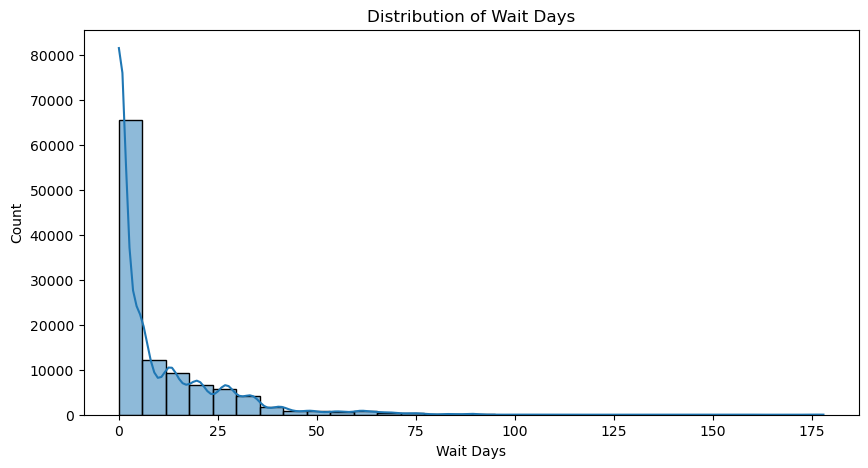

In [17]:
# Histogram of wait days
plt.figure(figsize=(10,5))
sns.histplot(df["WaitDays"], bins=30, kde=True)
plt.title("Distribution of Wait Days")
plt.xlabel("Wait Days")
plt.ylabel("Count")
plt.show()

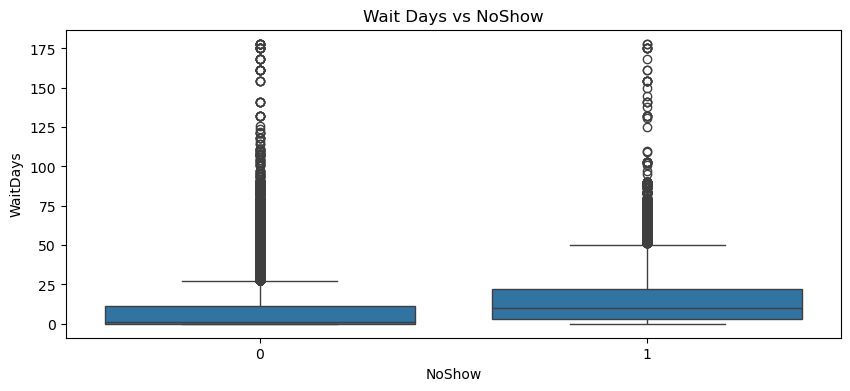

In [18]:
#3.Wait Days vs NoShow
plt.figure(figsize=(10,4))
sns.boxplot(x="NoShow", y="WaitDays", data=df)
plt.title("Wait Days vs NoShow")
plt.show()

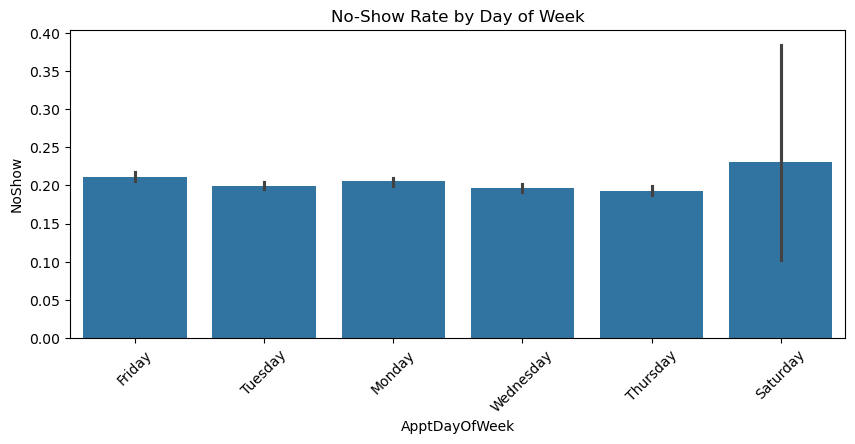

In [20]:
#4. Day of Week vs NoShow
plt.figure(figsize=(10,4))
sns.barplot(x="ApptDayOfWeek", y="NoShow", data=df)
plt.title("No-Show Rate by Day of Week")
plt.xticks(rotation=45)
plt.show()